In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import datetime as dt
from pandas.plotting import table
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [59]:
data=pd.read_csv('NFLX.csv')
data.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-29,4.045714,4.127857,3.842143,3.916429,3.916429,67032000
1,2004-01-05,3.892857,4.578571,3.875000,4.428571,4.428571,216480600


In [3]:
data.tail(2)

,Date,Open,High,Low,Close,Adj Close,Volume
782,2018-12-24,242.000000,261.910004,231.229996,256.079987,256.079987,47178300
783,2018-12-31,260.160004,270.100006,260.000000,267.660004,267.660004,13508900


In [4]:
data['Date']=pd.to_datetime(data['Date'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       784 non-null    datetime64[ns]
 1   Open       784 non-null    float64       
 2   High       784 non-null    float64       
 3   Low        784 non-null    float64       
 4   Close      784 non-null    float64       
 5   Adj Close  784 non-null    float64       
 6   Volume     784 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 43.0 KB


In [6]:
data.isnull().values.sum()

0

In [7]:
data.skew().sort_values()

Low          2.168003
Close        2.172923
Adj Close    2.172923
Open         2.188166
High         2.192259
Volume       2.773913
dtype: float64

In [8]:
data.kurtosis().sort_values()

Low           4.369290
Close         4.379669
Adj Close     4.379669
Open          4.462732
High          4.473495
Volume       12.455829
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000297566D1A88>,
      dtype=object)

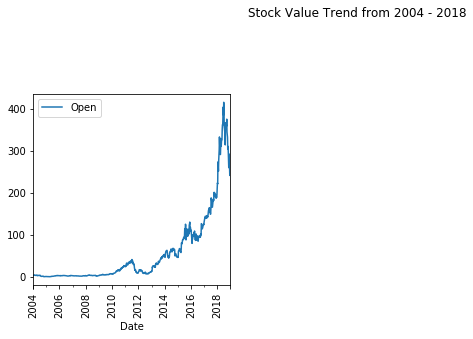

In [10]:
data.plot(x='Date',y='Open', subplots=True, layout= (3,3), figsize=(12,12), sharex = False, title = "Stock Value Trend from 2004 - 2018", rot = 90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000297565A31C8>,
      dtype=object)

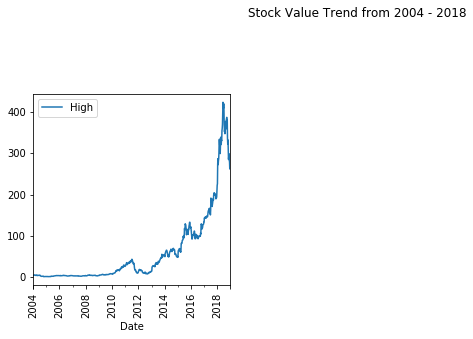

In [11]:
data.plot(x='Date',y='High', subplots=True, layout= (3,3), figsize=(12,12), sharex = False, title = "Stock Value Trend from 2004 - 2018", rot = 90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000297572C80C8>,
      dtype=object)

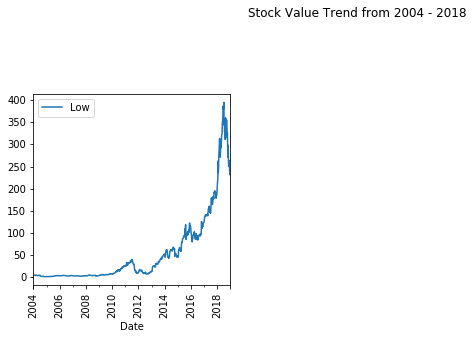

In [12]:
data.plot(x='Date',y='Low', subplots=True, layout= (3,3), figsize=(12,12), sharex = False, title = "Stock Value Trend from 2004 - 2018", rot = 90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000297575B27C8>,
      dtype=object)

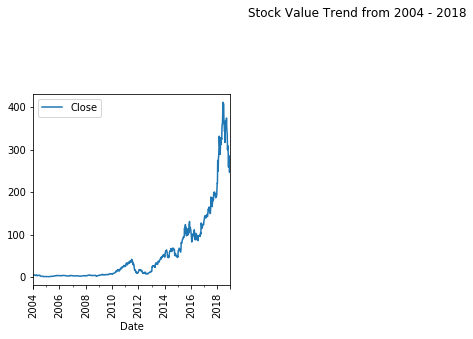

In [13]:
data.plot(x='Date',y='Close', subplots=True, layout= (3,3), figsize=(12,12), sharex = False, title = "Stock Value Trend from 2004 - 2018", rot = 90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002975786D0C8>,
      dtype=object)

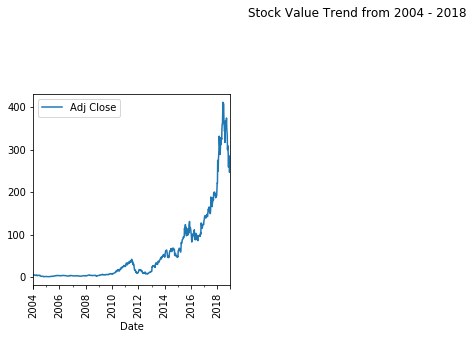

In [14]:
data.plot(x='Date',y='Adj Close', subplots=True, layout= (3,3), figsize=(12,12), sharex = False, title = "Stock Value Trend from 2004 - 2018", rot = 90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029757BAB108>,
      dtype=object)

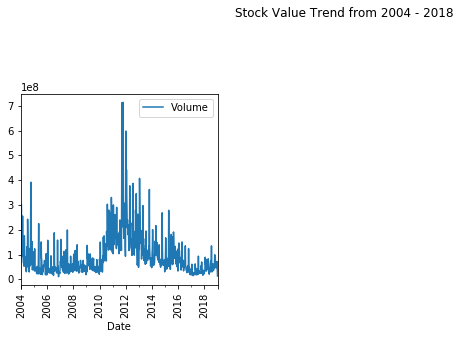

In [15]:
data.plot(x='Date',y='Volume', subplots=True, layout= (3,3), figsize=(12,12), sharex = False, title = "Stock Value Trend from 2004 - 2018", rot = 90)

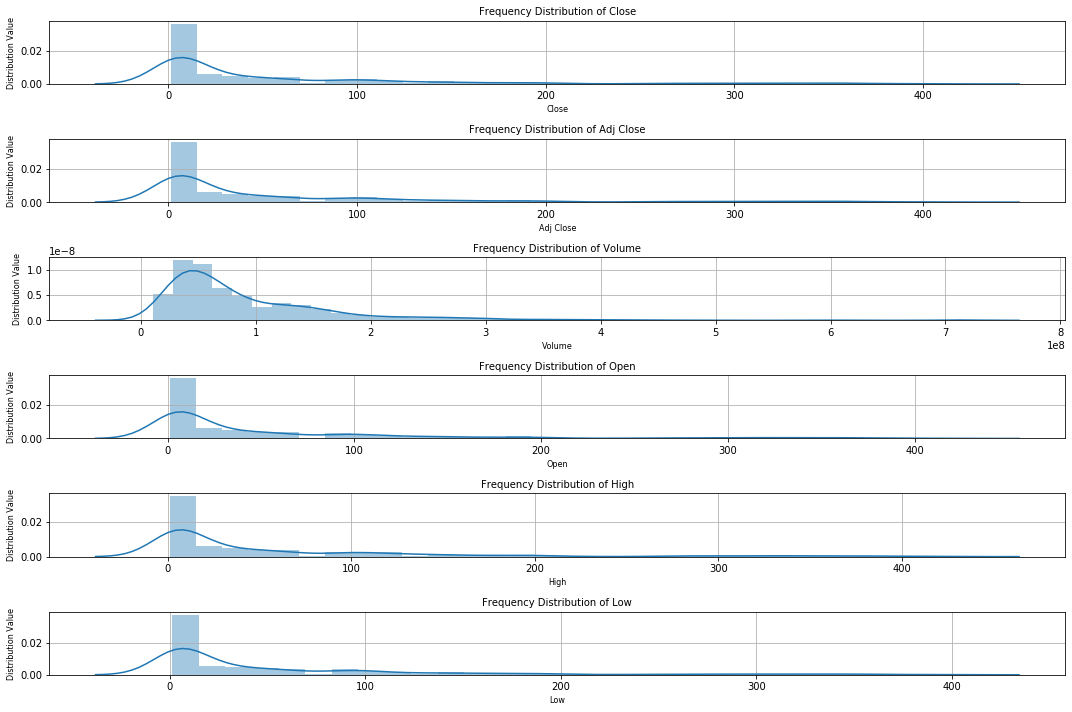

In [19]:
Column_List = ['Close', 'Adj Close', 'Volume','Open','High', 'Low']
fig, ax = plt.subplots(len(Column_List), figsize = (15, 10))

for i, col_list in enumerate(Column_List):
    sns.distplot(data[col_list], hist = True, ax = ax[i])
    ax[i].set_title ("Frequency Distribution of" + " " + col_list, fontsize = 10)
    ax[i].set_xlabel (col_list, fontsize = 8)
    ax[i].set_ylabel ('Distribution Value', fontsize = 8)
    fig.tight_layout (pad = 1.1) # To provide space between plots
    ax[i].grid('on')

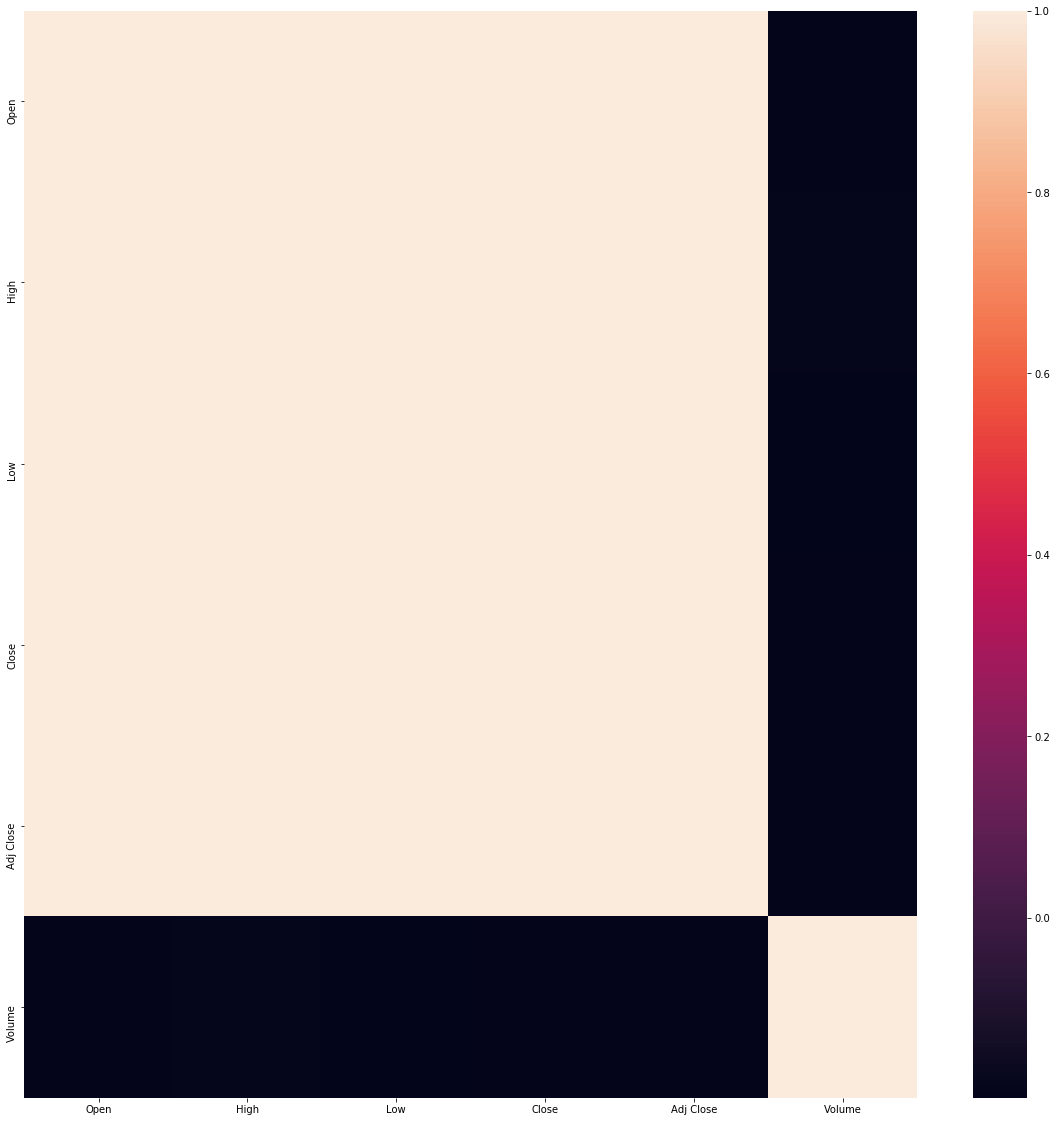

In [20]:
fig.ax=plt.subplots(figsize=(20,20))
corr_matrix=data.corr()
sns.heatmap(corr_matrix, xticklabels = corr_matrix.columns.values, yticklabels = corr_matrix.columns.values)


In [21]:
corr_matrix

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998886,0.998900,0.997494,0.997494,-0.191197
High,0.998886,1.000000,0.998652,0.999052,0.999052,-0.184615
Low,0.998900,0.998652,1.000000,0.998856,0.998856,-0.198620
Close,0.997494,0.999052,0.998856,1.000000,1.000000,-0.191743
Adj Close,0.997494,0.999052,0.998856,1.000000,1.000000,-0.191743
Volume,-0.191197,-0.184615,-0.198620,-0.191743,-0.191743,1.000000


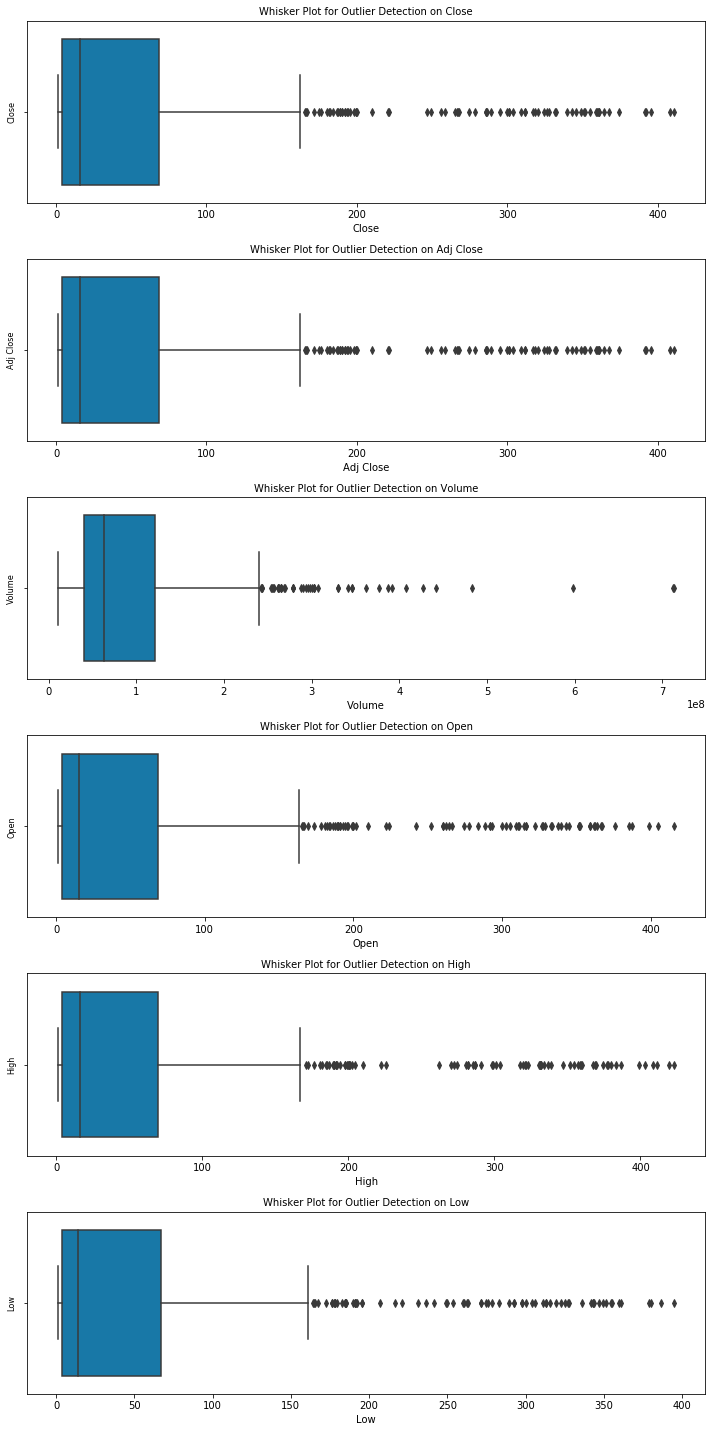

In [22]:
fig, ax = plt.subplots (len(Column_List), figsize = (10, 20))

for i, col_list in enumerate(Column_List):
    sns.boxplot(data[col_list], ax = ax[i], palette = "winter", orient = 'h')
    ax[i].set_title("Whisker Plot for Outlier Detection on" + " " + col_list, fontsize = 10)
    ax[i].set_ylabel(col_list, fontsize = 8)
    fig.tight_layout(pad = 1.1)

In [23]:
Desp_Statistics=data.describe()
Desp_Statistics=Desp_Statistics.T
Desp_Statistics['IQR']=Desp_Statistics['75%']-Desp_Statistics['25%']
data = data[(np.abs(stats.zscore(data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']])) < 3).all(axis = 1)] 

In [24]:
data=data.reset_index()

In [26]:
data.head(2)

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2003-12-29,4.045714,4.127857,3.842143,3.916429,3.916429,67032000
1,1,2004-01-05,3.892857,4.578571,3.875000,4.428571,4.428571,216480600


In [27]:
data=data.drop(columns=['index'])

In [28]:
data.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-29,4.045714,4.127857,3.842143,3.916429,3.916429,67032000
1,2004-01-05,3.892857,4.578571,3.875000,4.428571,4.428571,216480600


In [42]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['WeekDay'] = data['Date'].dt.weekday

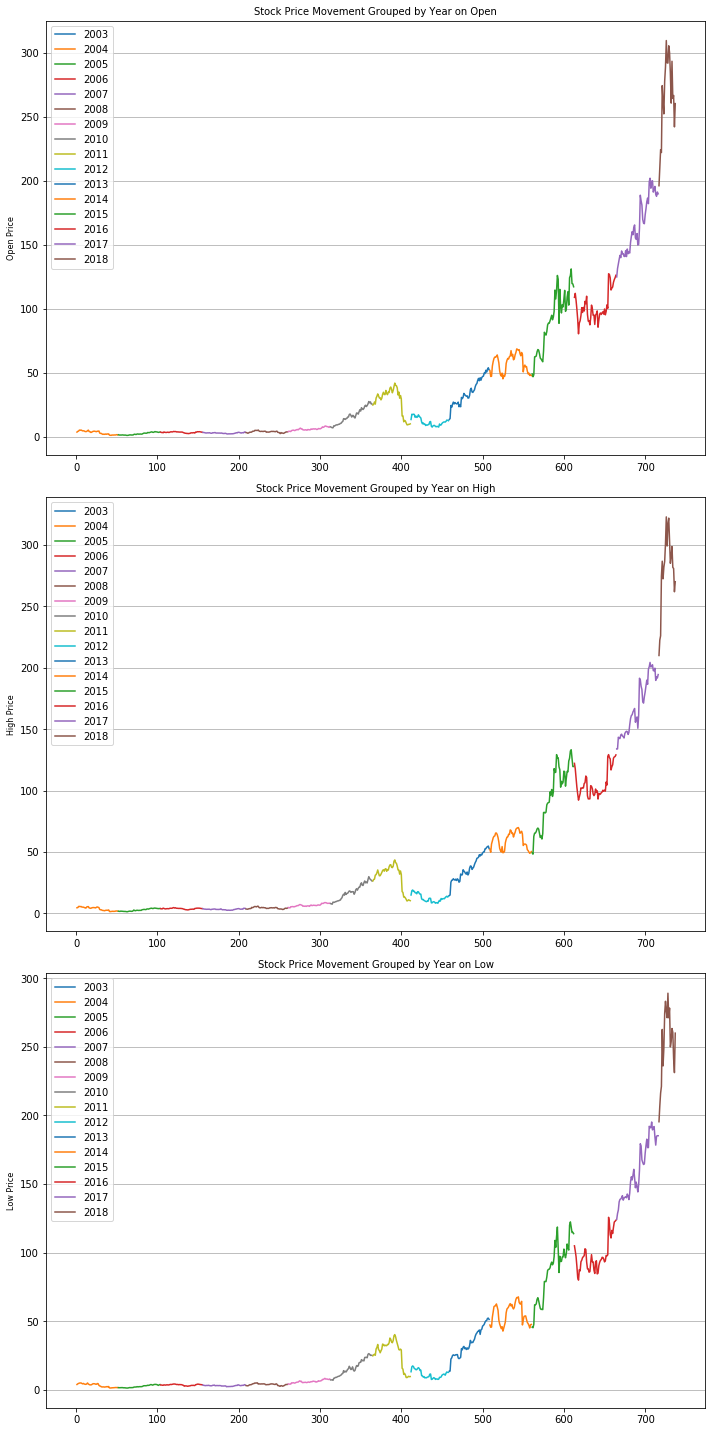

In [34]:
Column_List = ['Open', 'High', 'Low']
fig, ax = plt.subplots(len(Column_List), figsize = (10, 20))
for i, col_list in enumerate(Column_List):
    data.groupby('Year')[col_list].plot(ax = ax[i], legend = True)
    ax[i].set_title("Stock Price Movement Grouped by Year on" + " " + col_list, fontsize = 10)
    ax[i].set_ylabel(col_list + " " + "Price", fontsize = 8)
    fig.tight_layout(pad = 1.1)
    ax[i].yaxis.grid(True)

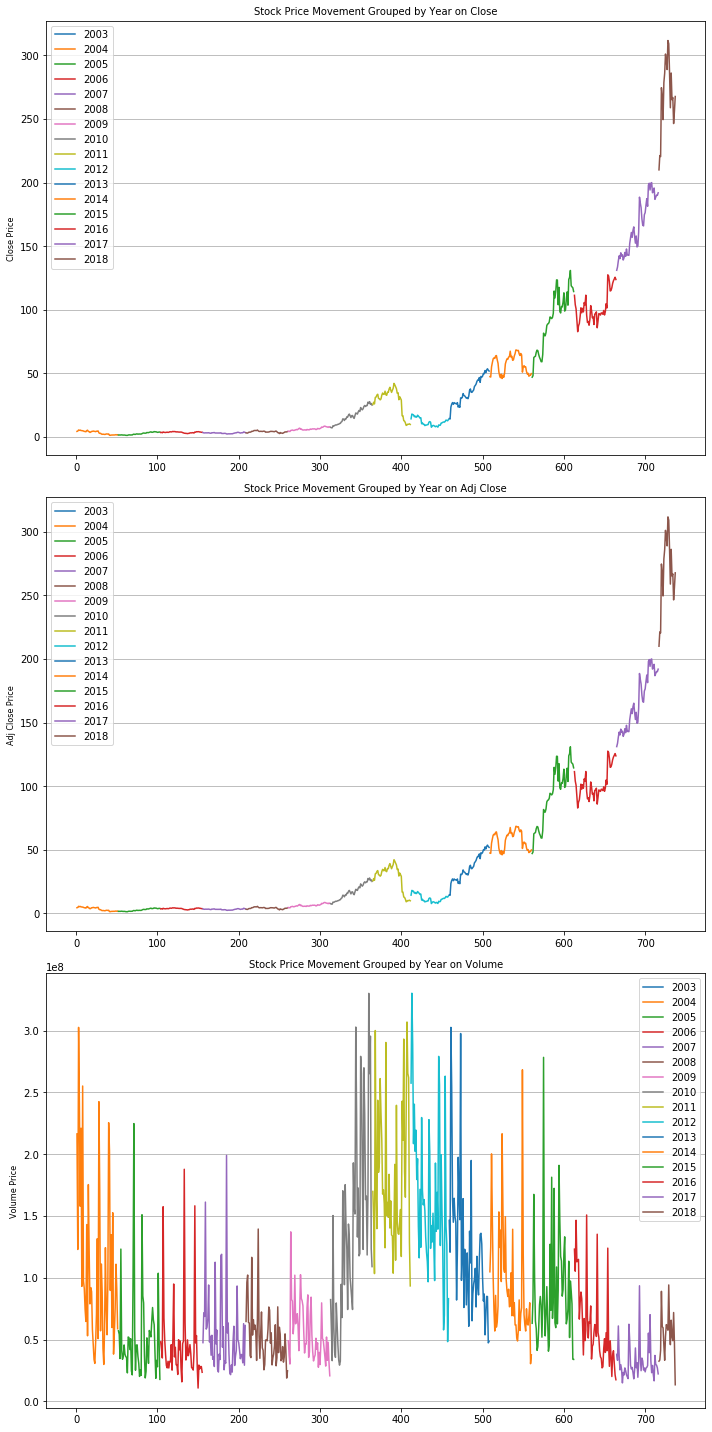

In [35]:
Column_List = ['Close', 'Adj Close', 'Volume']
fig, ax = plt.subplots(len(Column_List), figsize = (10, 20))
for i, col_list in enumerate(Column_List):
    data.groupby('Year')[col_list].plot(ax = ax[i], legend = True)
    ax[i].set_title("Stock Price Movement Grouped by Year on" + " " + col_list, fontsize = 10)
    ax[i].set_ylabel(col_list + " " + "Price", fontsize = 8)
    fig.tight_layout(pad = 1.1)
    ax[i].yaxis.grid(True)

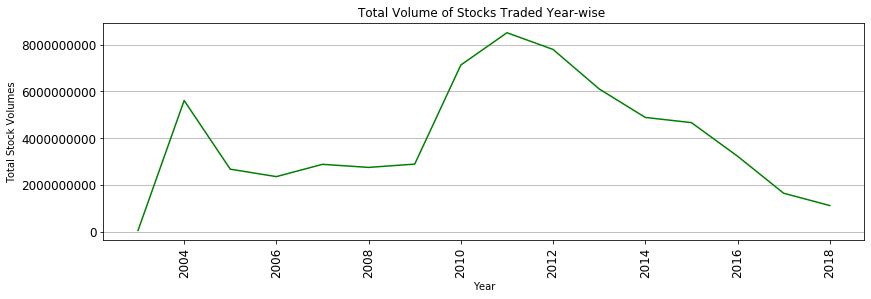

In [39]:
check = data.groupby('Year')['Volume'].sum()
plt.figure(figsize = (30, 4))
ax1 = plt.subplot(121)
check.plot(y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Total Volume of Stocks Traded Year-wise ", rot = 90, color = "green")
ax1.ticklabel_format(useOffset = False, style = 'plain')
ax1.set_ylabel("Total Stock Volumes")
ax1.yaxis.grid(True)

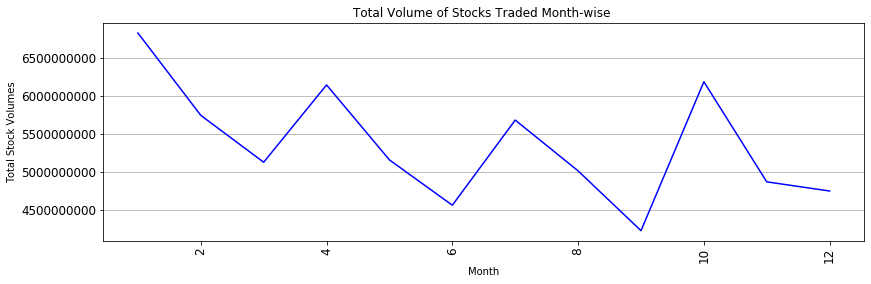

In [38]:
check = data.groupby('Month')['Volume'].sum()
plt.figure(figsize = (30, 4))
ax1 = plt.subplot(121)
check.plot(y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Total Volume of Stocks Traded Month-wise ", rot = 90, color = "blue")
ax1.ticklabel_format(useOffset = False, style = 'plain')
ax1.set_ylabel("Total Stock Volumes")
ax1.yaxis.grid(True)

In [44]:
for i, col_list in enumerate(Column_List):
    var = data.groupby('Year')[col_list].sum()

In [45]:
var=pd.DataFrame(var)

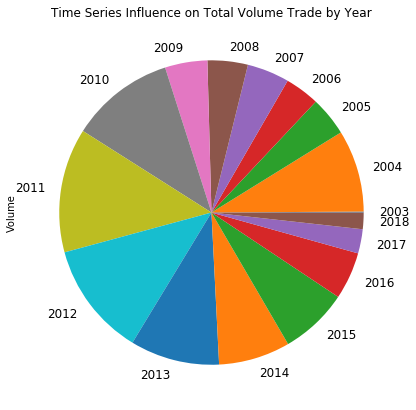

In [46]:
# Plot to understand the trend
plt.figure(figsize = (16, 7))
ax1 = plt.subplot(121)
var.plot(kind = "pie", y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Time Series Influence on Total Volume Trade by Year", ax = ax1)

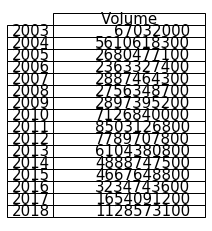

In [47]:
# Plot the table to identify numbers
ax2 = plt.subplot(122)
plt.axis('off') # Since we are plotting the table
tbl = table(ax2, var, loc = 'center')
tbl.auto_set_font_size(30)
tbl.set_fontsize(15)
plt.show()


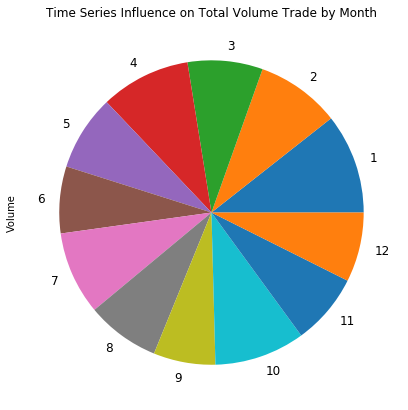

In [48]:
for i, col_list in enumerate(Column_List):
    var = data.groupby('Month')[col_list].sum()
    
# Convert the variable into a pandas dataframe
var = pd.DataFrame(var)

# Plot to understand the trend
plt.figure(figsize = (16, 7))
ax1 = plt.subplot(121)
var.plot(kind = "pie", y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Time Series Influence on Total Volume Trade by Month", ax = ax1)

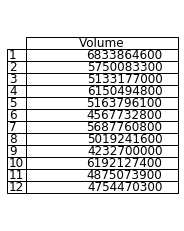

In [49]:
ax2 = plt.subplot(122)
plt.axis('off') # Since we are plotting the table
tbl = table(ax2, var, loc = 'center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
plt.show()

In [57]:
from fbprophet import Prophet

In [61]:
data=data.drop(columns=['Open','High','Low','Adj Close','Volume',])

In [62]:
data=data.rename(columns={'Date':'ds'})
data=data.rename(columns={'Close':'y'})
data

,ds,y
0,2003-12-29,3.916429
1,2004-01-05,4.428571
2,2004-01-12,4.682857
3,2004-01-19,5.535714
4,2004-01-26,5.243571
...,...,...
779,2018-12-03,265.140015
780,2018-12-10,266.839996
781,2018-12-17,246.389999
782,2018-12-24,256.079987


In [64]:
m=Prophet()
m.fit(data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [65]:
predper = 30

In [66]:
future = m.make_future_dataframe(periods=predper)
future.tail()

,ds
809,2019-01-26
810,2019-01-27
811,2019-01-28
812,2019-01-29
813,2019-01-30


In [67]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
809,2019-01-26,331.910060,305.331678,357.549280
810,2019-01-27,332.160805,303.618153,358.426673
811,2019-01-28,332.391652,304.064040,357.195211
812,2019-01-29,332.605953,306.074284,358.977639
813,2019-01-30,332.807290,307.271950,361.741284


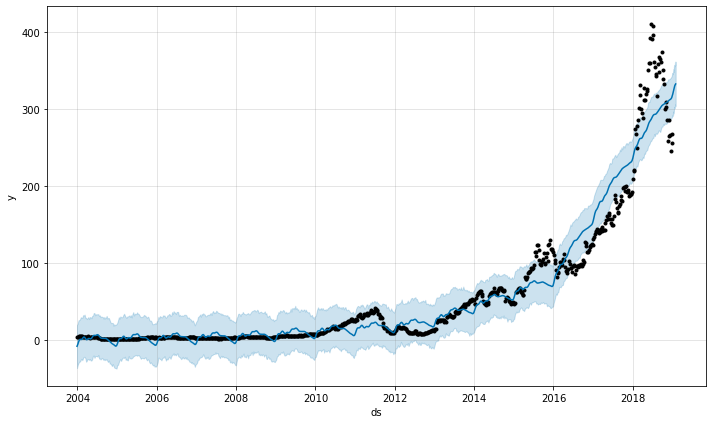

In [68]:
fig1 = m.plot(forecast)

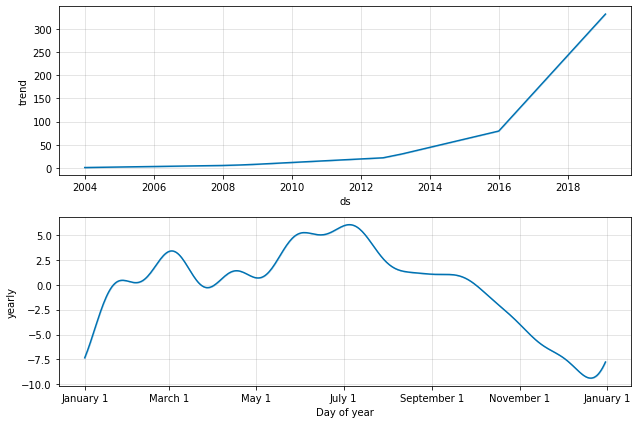

In [69]:
fig2 = m.plot_components(forecast)

In [70]:
from fbprophet.diagnostics import cross_validation


In [71]:
df_cv = cross_validation(m, initial='400 days', period='200 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 24 forecasts with cutoffs between 2005-05-28 00:00:00 and 2017-12-31 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2005-05-30,1.711585,1.410205,2.040583,2.095714,2005-05-28
1,2005-06-06,1.520357,1.235635,1.824679,2.415714,2005-05-28
2,2005-06-13,1.613912,1.293720,1.907195,2.460000,2005-05-28
3,2005-06-20,1.869252,1.576285,2.165801,2.252857,2005-05-28
4,2005-06-27,1.969135,1.659437,2.282458,2.364286,2005-05-28


In [72]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
1247,2018-12-03,209.970803,197.182836,222.098526,265.140015,2017-12-31
1248,2018-12-10,210.538046,198.356651,223.405543,266.839996,2017-12-31
1249,2018-12-17,210.766386,199.256839,223.110188,246.389999,2017-12-31
1250,2018-12-24,210.677698,197.948803,222.683637,256.079987,2017-12-31
1251,2018-12-31,210.595889,198.234827,222.572687,267.660004,2017-12-31


In [73]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,345.241443,18.580674,10.598610,0.335870,0.230523,0.200000
1,38 days,352.139767,18.765387,10.805519,0.341198,0.233803,0.196000
2,39 days,351.227907,18.741075,10.774410,0.334543,0.233803,0.200000
3,40 days,364.891647,19.102137,11.065719,0.330660,0.236828,0.194667
4,41 days,369.163095,19.213617,11.205017,0.342258,0.263639,0.192000


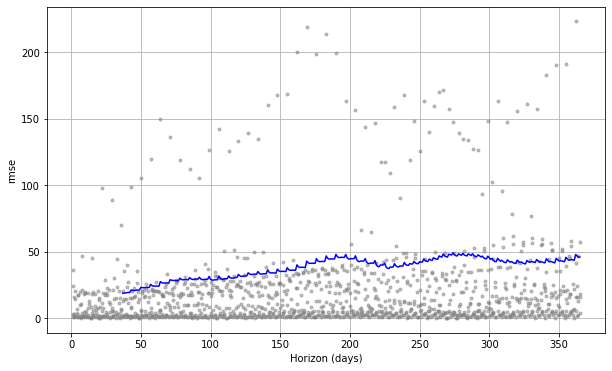

In [74]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')